<a href="https://colab.research.google.com/github/jordan-dsouza/CodeClauseInternship_Projects/blob/main/Apriori_algo_Market__analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support(a)** = (number of transactions containing 'a')/total transactions

**Confidence(a->b)**= (number of transactions containing a and b)/ number of transactions containing "a".
How likely "b" is purchased when "a" is purchased.

**Lift** is ratio between confidence and support.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
!pip install apyori
from apyori import apriori
sns.set()

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=e0b8656b880877bc3eb48584ae64f01f344a7a8672ed1ea6909af1ac4c27c0c5
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
data = pd.read_csv("groceries - groceries.csv")
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Replacing null values with zero:
data.fillna(0, inplace = True)
data.drop("Item(s)", axis = 1, inplace = True)
data.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


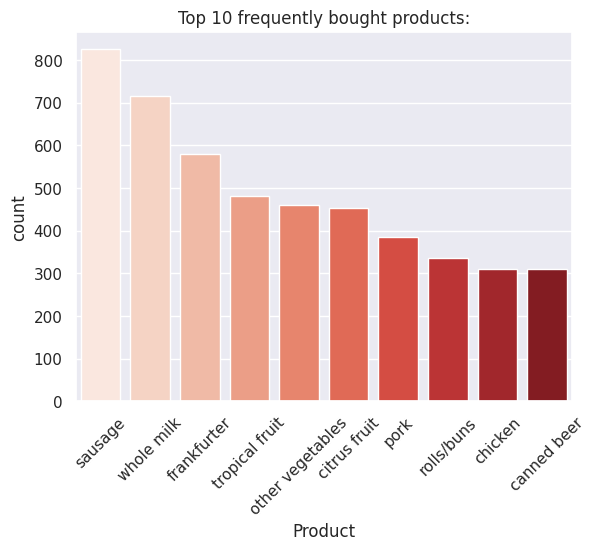

In [ ]:
sns.countplot(data=data, x=data["Item 1"],
             order = data["Item 1"].value_counts().head(10).index,
             palette="Reds")
plt.xticks(rotation=45)
plt.xlabel("Product")
plt.title("Top 10 frequently bought products:")
plt.show()

In [ ]:
transactions = data.values.astype(str).tolist()

In [ ]:
# Deleting 'nan' values:
transactions = [[item for item in row if item != "0"] for row in transactions]

In [ ]:
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [ ]:
transactions[0]

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']

In [ ]:
#Call apriori function which requires minimum support, confidance and lift, min length is combination of item default is 2".
rules = apriori(transactions,min_support=0.005,min_confidance=0.3,min_lift=3,min_length=2)

In [ ]:
df_results = pd.DataFrame(list(rules))
df_results.head()

,items,support,ordered_statistics
0,"(root vegetables, beef)",0.017387,"[((beef), (root vegetables), 0.331395348837209..."
1,"(whipped/sour cream, berries)",0.009049,"[((berries), (whipped/sour cream), 0.272171253..."
2,"(frozen vegetables, chicken)",0.006711,"[((chicken), (frozen vegetables), 0.1563981042..."
3,"(chocolate, waffles)",0.005796,"[((chocolate), (waffles), 0.1168032786885246, ..."
4,"(ham, white bread)",0.005084,"[((ham), (white bread), 0.1953125, 4.639851298..."


In [ ]:
#Support:
support = df_results.support
support.head()

0    0.017387
1    0.009049
2    0.006711
3    0.005796
4    0.005084
Name: support, dtype: float64

In [ ]:
value1 = []
value2 = []
value3 = []
value4 = []

for i in range(df_results.shape[0]):
    new_list = df_results["ordered_statistics"][i][0]
    value1.append(list(new_list[0]))
    value2.append(list(new_list[1]))
    value3.append(new_list[2])
    value4.append(new_list[3])

In [ ]:
#Converting lists into dataframe:
left = pd.DataFrame(value1)
right = pd.DataFrame(value2)
confidance = pd.DataFrame(value3,columns = ["Confidance"])
lift = pd.DataFrame(value4,columns = ["lift"])

In [ ]:
left.head(2)

,0
0,beef
1,berries


In [ ]:
right.head(2)

,0,1,2
0,root vegetables,None,None
1,whipped/sour cream,None,None


In [ ]:
confidance.head(2)

,Confidance
0,0.331395
1,0.272171


In [ ]:
lift.head(2)

,lift
0,3.040367
1,3.796886


In [ ]:
#Displaying df, replacing null values with space " ":
last_df = pd.concat([left, right, support, confidance, lift], axis=1)
last_df.head()

,0,0,1,2,support,Confidance,lift
0,beef,root vegetables,None,None,0.017387,0.331395,3.040367
1,berries,whipped/sour cream,None,None,0.009049,0.272171,3.796886
2,chicken,frozen vegetables,None,None,0.006711,0.156398,3.251956
3,chocolate,waffles,None,None,0.005796,0.116803,3.039048
4,ham,white bread,None,None,0.005084,0.195312,4.639851


In [ ]:
last_df.fillna(value=' ', inplace=True)

In [ ]:
#Column names:
last_df.columns = ["left", 1, 2, "right", "support", "confidance", "lift"]
last_df.head()

,left,1,2,right,support,confidance,lift
0,beef,root vegetables,,,0.017387,0.331395,3.040367
1,berries,whipped/sour cream,,,0.009049,0.272171,3.796886
2,chicken,frozen vegetables,,,0.006711,0.156398,3.251956
3,chocolate,waffles,,,0.005796,0.116803,3.039048
4,ham,white bread,,,0.005084,0.195312,4.639851


In [ ]:
#Combining right, 1, 2:
last_df["right"] = last_df["right"] + last_df[1] + str(", ") + last_df[2]

In [ ]:
last_df.drop(columns = [1,2], inplace = True)
last_df.head()

,left,right,support,confidance,lift
0,beef,"root vegetables,",0.017387,0.331395,3.040367
1,berries,"whipped/sour cream,",0.009049,0.272171,3.796886
2,chicken,"frozen vegetables,",0.006711,0.156398,3.251956
3,chocolate,"waffles,",0.005796,0.116803,3.039048
4,ham,"white bread,",0.005084,0.195312,4.639851
